In [26]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [27]:
#membaca data csv
data = pd.read_csv('forestfires.csv')
data.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,NaN,51,NaN,0.0,0.0
1,7,5,oct,tue,90.6,35.4,669.1,6.7,NaN,33,NaN,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,NaN,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [28]:
#melihat ringkasan data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       517 non-null    int64  
 1   Y       517 non-null    int64  
 2   month   517 non-null    object 
 3   day     517 non-null    object 
 4   FFMC    517 non-null    float64
 5   DMC     517 non-null    float64
 6   DC      517 non-null    float64
 7   ISI     517 non-null    float64
 8   temp    515 non-null    float64
 9   RH      517 non-null    int64  
 10  wind    514 non-null    float64
 11  rain    517 non-null    float64
 12  area    517 non-null    float64
dtypes: float64(8), int64(3), object(2)
memory usage: 52.6+ KB


In [29]:
#melihat last update yang unique
data['month'].unique()

array(['mar', 'oct', 'aug', 'sep', 'apr', 'jun', 'jul', 'feb', 'jan',
       'dec', 'may', 'nov'], dtype=object)

In [30]:
#membuat statis/melihat kolom yang variable nya statis
latest_date = 'dec'
data[data['month']==latest_date]

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
273,4,6,dec,sun,84.4,27.2,353.5,6.8,4.8,57,8.5,0.0,8.98
274,8,6,dec,wed,84.0,27.8,354.6,5.3,5.1,61,8.0,0.0,11.19
275,4,6,dec,thu,84.6,26.4,352.0,2.0,5.1,61,4.9,0.0,5.38
276,4,4,dec,mon,85.4,25.4,349.7,2.6,4.6,21,8.5,0.0,17.85
277,3,4,dec,mon,85.4,25.4,349.7,2.6,4.6,21,8.5,0.0,10.73
278,4,4,dec,mon,85.4,25.4,349.7,2.6,4.6,21,8.5,0.0,22.03
279,4,4,dec,mon,85.4,25.4,349.7,2.6,4.6,21,8.5,0.0,9.77
280,4,6,dec,fri,84.7,26.7,352.6,4.1,2.2,59,4.9,0.0,9.27
281,6,5,dec,tue,85.4,25.4,349.7,2.6,5.1,24,8.5,0.0,24.77


In [31]:
#melihat day yang unique
unique_day = data[data.temp>0]['day'].unique()
unique_day.sort()
unique_day

array(['fri', 'mon', 'sat', 'sun', 'thu', 'tue', 'wed'], dtype=object)

In [32]:
day_temp_case = []
for i in unique_day:
    day_temp_case.append(data[data.temp>0][data['day']==i][data['month']==latest_date].temp.sum())

C:\Users\rhyan\AppData\Local\Temp\ipykernel_16368\1964691480.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  day_temp_case.append(data[data.temp>0][data['day']==i][data['month']==latest_date].temp.sum())


In [33]:
print(set(zip(unique_day, day_temp_case)))

{('sat', 0.0), ('sun', 4.8), ('thu', 5.1), ('fri', 2.2), ('wed', 5.1), ('tue', 5.1), ('mon', 18.4)}


In [34]:
unique_month = data['month'][data.temp>1].unique()
unique_month

array(['oct', 'mar', 'aug', 'sep', 'apr', 'jun', 'jul', 'feb', 'jan',
       'dec', 'may', 'nov'], dtype=object)

In [35]:
month_temp_case = []
for i in unique_month:
    month_temp_case.append(data[data.temp>0][data['temp']==i][data['day']==latest_date].temp.sum())

C:\Users\rhyan\AppData\Local\Temp\ipykernel_16368\4125923029.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  month_temp_case.append(data[data.temp>0][data['temp']==i][data['day']==latest_date].temp.sum())


In [36]:
print(set(zip(unique_month, month_temp_case)))

{('jun', 0.0), ('jul', 0.0), ('feb', 0.0), ('apr', 0.0), ('may', 0.0), ('jan', 0.0), ('nov', 0.0), ('dec', 0.0), ('oct', 0.0), ('mar', 0.0), ('aug', 0.0), ('sep', 0.0)}


In [37]:
nan_indices = []
for i in range(len(unique_month)):
    if type(unique_month[i])==float:
        nan_indices.append(i)

In [38]:
unique_month = list(unique_month)
month_temp_case = list(month_temp_case)

In [39]:
for i in nan_indices:
    unique_month.pop(i)
    month_temp_case.pop(i)
    
unique_month

['oct',
 'mar',
 'aug',
 'sep',
 'apr',
 'jun',
 'jul',
 'feb',
 'jan',
 'dec',
 'may',
 'nov']

<function matplotlib.pyplot.show(close=None, block=None)>

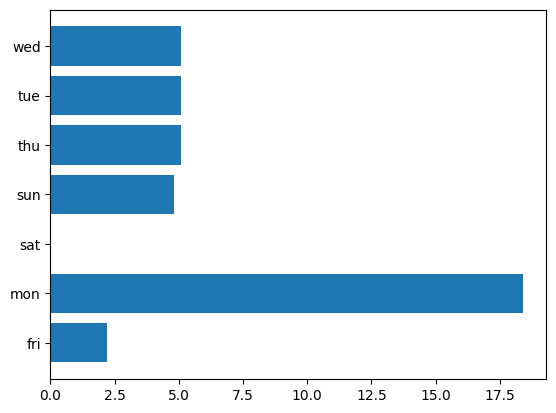

In [40]:
plt.barh(unique_day, day_temp_case)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

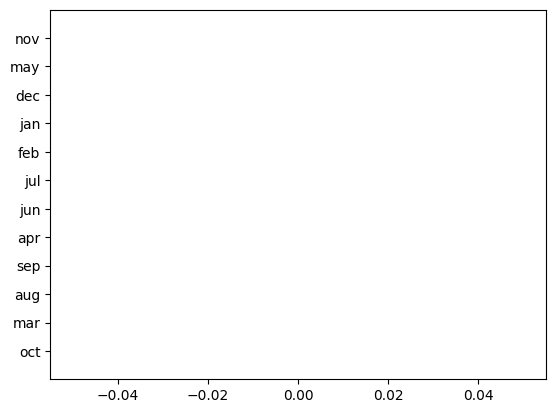

In [41]:
plt.barh(unique_month, month_temp_case)
plt.show

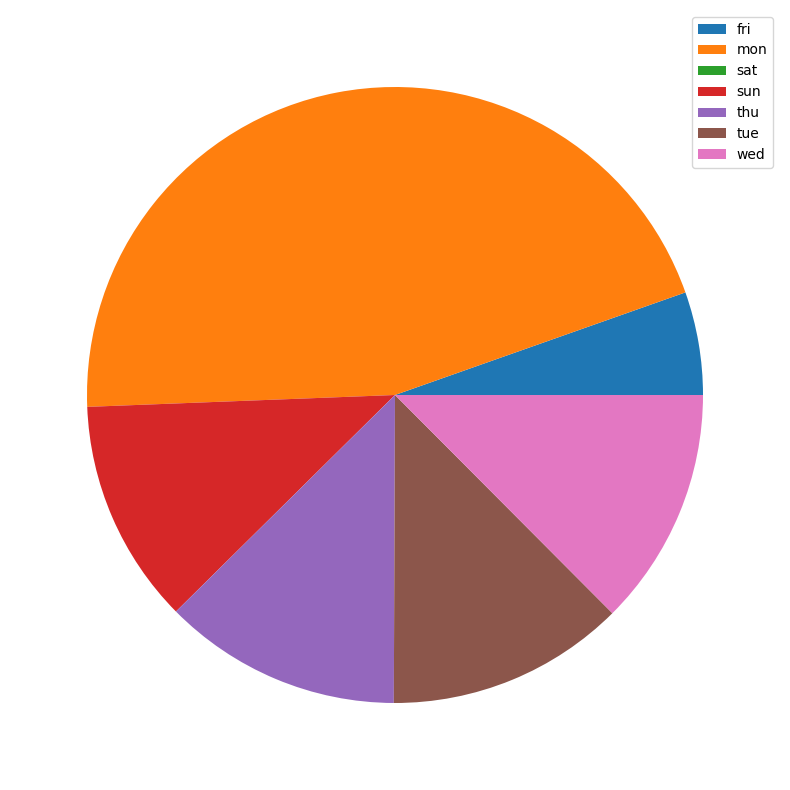

In [42]:
plt.figure(figsize=(10,10))
plt.pie(day_temp_case)
plt.legend(unique_day, loc='best')
plt.show()

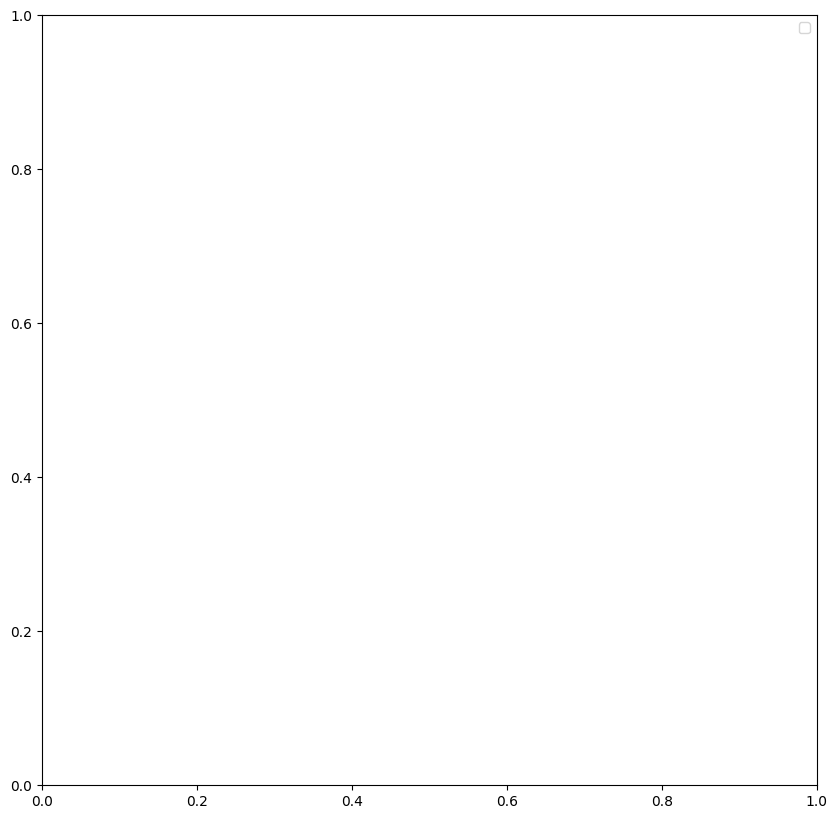

In [50]:
plt.figure(figsize=(10,10))
plt.legend(unique_month, loc='best')
plt.show()